In [89]:
import pandas as pd
import pykrev as pk
import numpy as np
import seaborn as sns
from sklearn import decomposition
from matplotlib import pyplot as plt

from matplotlib.lines import Line2D


In [4]:
#read the ordination data 
ordinationData = pd.read_csv("../ordination/333_ordination.csv",index_col=0)

In [5]:
#zero-fill the ordination data 
zeroFill = ordinationData.fillna(0)

In [6]:
#normalise the ordination data
normalise = pk.normalise_intensity(zeroFill,norm_transform='power3')

In [7]:
#read the metadata
metaData = pd.read_csv("../metadata/333_metadata.csv",index_col=0)

In [8]:
#create an empty dataframe to make the pca plots in
plotData = pd.DataFrame()
plotData['sample_id'] = ordinationData.index
plotData = pd.merge(plotData,metaData, how='left', left_on='sample_id', right_on='ID')

In [9]:
#do the PCA
PCA = decomposition.PCA()
pca_model = PCA.fit(normalise)
pca_result = pca_model.transform(normalise)


In [15]:
pca_model.components_.shape

(413, 56248)

'\nfor idx, mol in enumerate(ordinationData.columns[top_N_idx]):\n    print(pca_model.components_[0,:][top_N_idx[idx]])\n    ax.plot(pca_model.components_[0,:][top_N_idx[idx]],0.5-(idx*0.025))\n    ax.text(s=mol,x=pca_model.components_[0,:][top_N_idx[idx]],y=0.5-(idx*0.025))\n'

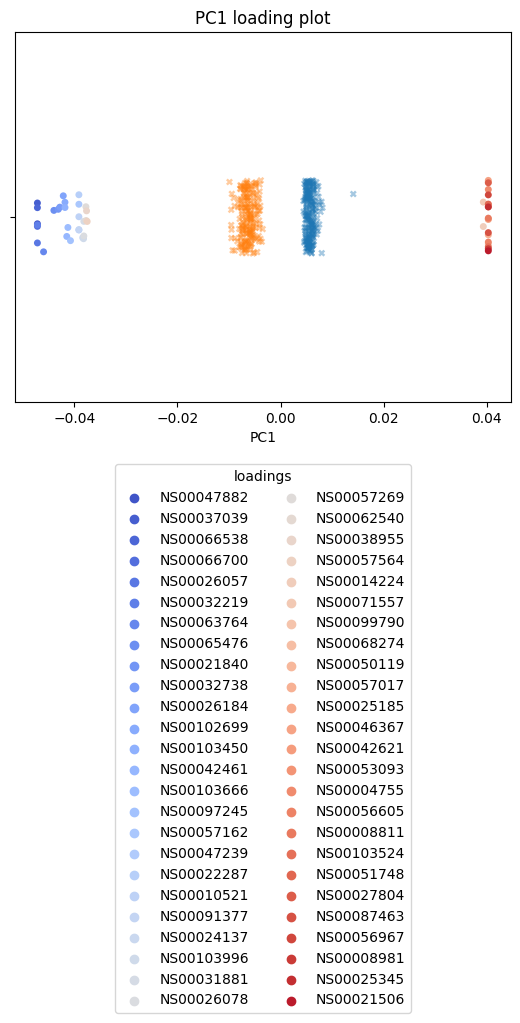

In [95]:
top_N_idx = np.argsort(abs(pca_model.components_[0,:]))[-50:]
scores = pca_model.components_[0,:][top_N_idx]
mols = ordinationData.columns[top_N_idx]
argidx = np.argsort(scores)
scores = scores[argidx]
mols = mols[argidx]

ax = sns.stripplot(x='PC1',data=plotData, hue='Instrument setup used',alpha=.4, marker='X', legend=False)
sns.stripplot(x=scores,ax=ax, hue=mols, palette='coolwarm',legend=True)


# Adjusting the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='loadings')
ax.set_title('PC1 loading plot')
"""
for idx, mol in enumerate(ordinationData.columns[top_N_idx]):
    print(pca_model.components_[0,:][top_N_idx[idx]])
    ax.plot(pca_model.components_[0,:][top_N_idx[idx]],0.5-(idx*0.025))
    ax.text(s=mol,x=pca_model.components_[0,:][top_N_idx[idx]],y=0.5-(idx*0.025))
"""

In [10]:
#plot data update 
plotData['PC1'] = pca_result[:,0]
plotData['PC2'] = pca_result[:,1]

Text(0, 0.5, 'PC2 (0.064%)')

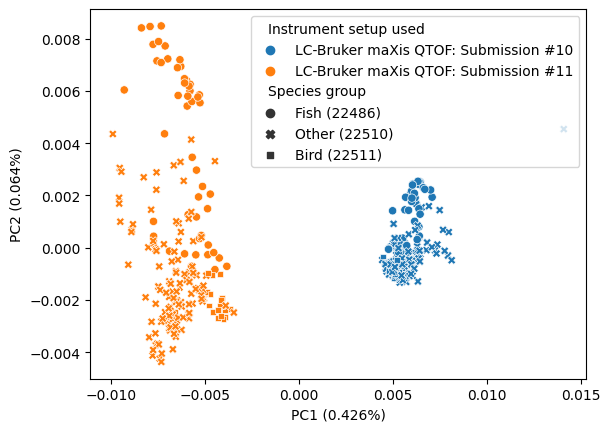

In [11]:
ax = sns.scatterplot(x='PC1',y='PC2',data=plotData, hue='Instrument setup used', style='Species group')
ax.set_xlabel(f'PC1 ({np.round(pca_model.explained_variance_ratio_[0],3)}%)')
ax.set_ylabel(f'PC2 ({np.round(pca_model.explained_variance_ratio_[1],3)}%)')